In [16]:
pip install scikit-learn

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/5d/85/6dff36f75ed9707f65fbd15832d599e2ebec6962d2e52fbbfba22c2df088/scikit_learn-1.4.1.post1-cp310-cp310-win_amd64.whl.metadata
  Obtaining dependency information for scipy>=1.6.0 from https://files.pythonhosted.org/packages/c5/97/0894cf6226508f9c8300447641f8f63d04d90617e27f0e6253d1ea299196/scipy-1.13.0-cp310-cp310-win_amd64.whl.metadata
     ---------------------------------------- 0.0/60.6 kB ? eta -:--:--
     -------------------- ------------------- 30.7/60.6 kB 1.4 MB/s eta 0:00:01
     -------------------------------------- 60.6/60.6 kB 811.9 kB/s eta 0:00:00
  Obtaining dependency information for joblib>=1.2.0 from https://files.pythonhosted.org/packages/10/40/d551139c85db202f1f384ba8bcf96aca2f329440a844f924c8a0040b6d02/joblib-1.3.2-py3-none-any.whl.metadata
  Obtaining dependency information for threadpoolctl>=2.0.0 from https://files.pythonhosted.org/packages/1e/84/ccd9b08653022b778


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [31]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats.mstats import winsorize
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
df = pd.read_csv('train.csv')

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [6]:
# del df['Alley']
del df['MasVnrType']
del df['FireplaceQu']
del df['PoolQC']
del df['Fence']
del df['MiscFeature']

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
duplicates = df.duplicated()
duplicates_df = df[duplicates]
duplicates_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice


In [9]:
sale = df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'LotArea', 'YearBuilt']]

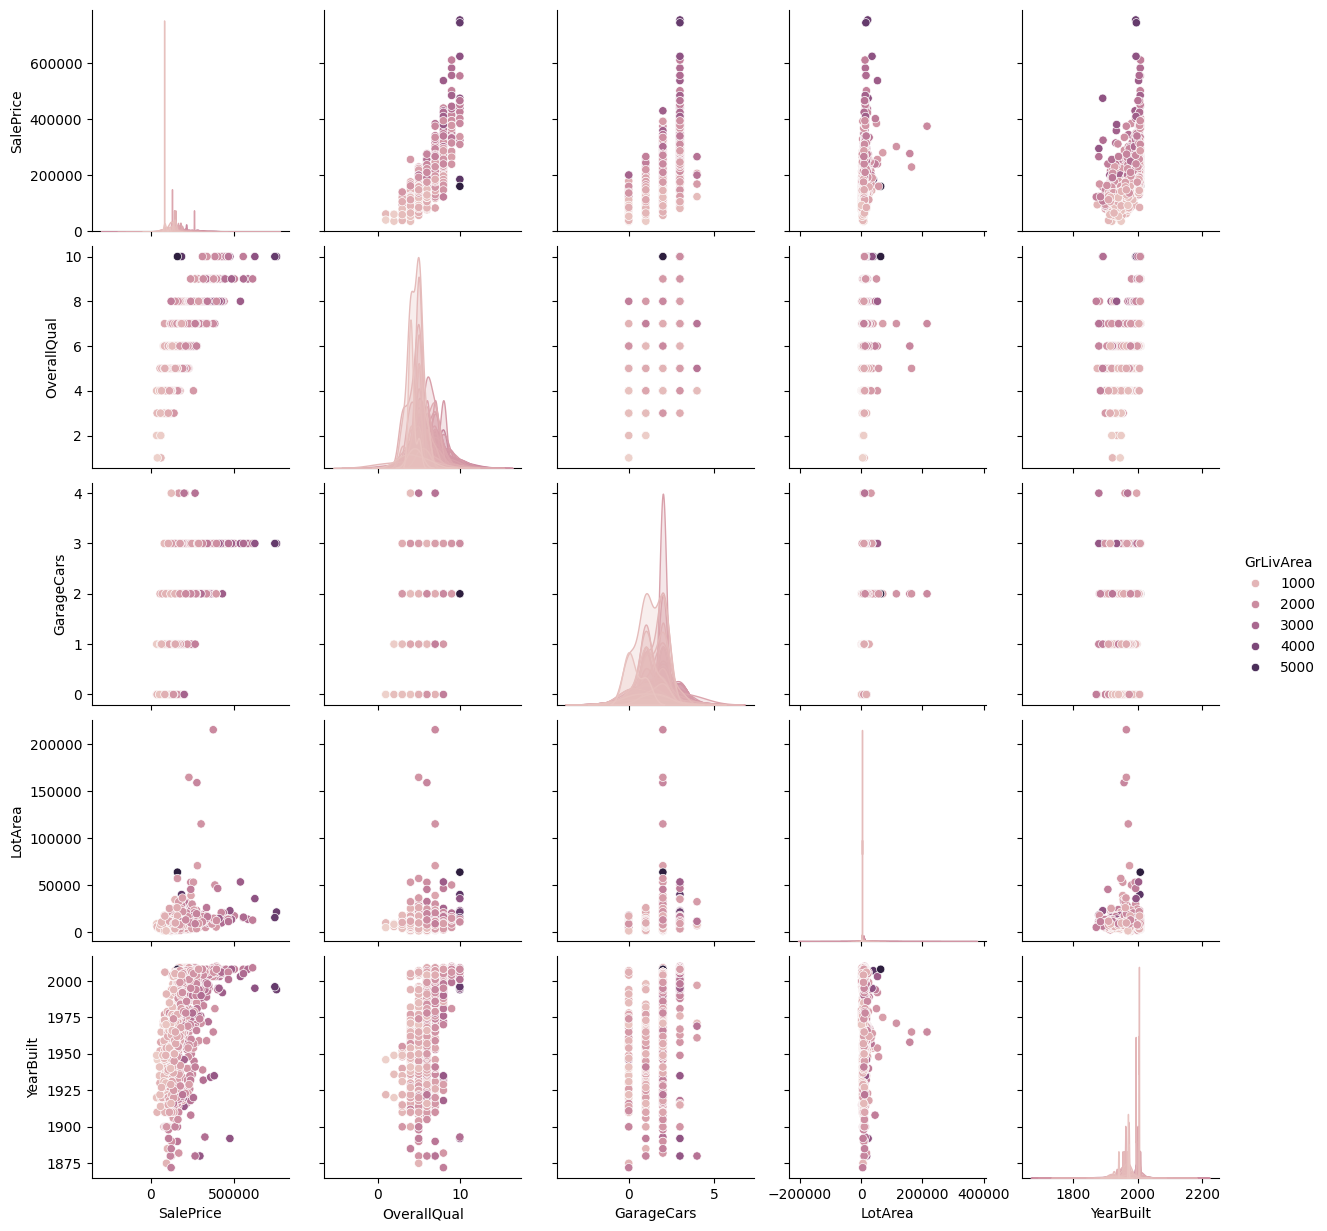

In [10]:
sns.pairplot(sale, hue='GrLivArea')

In [11]:
df.to_csv('cleaned_house_prices.csv', index=False)

In [12]:
df = pd.read_csv('cleaned_house_prices.csv')

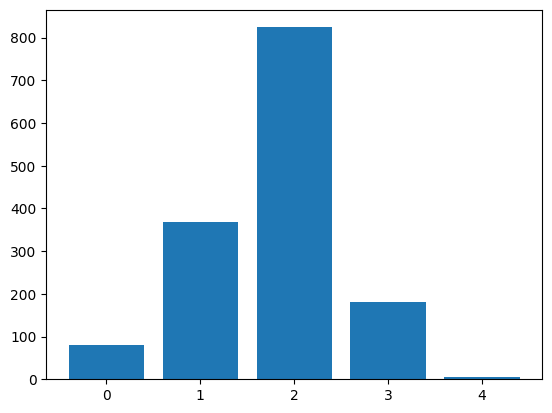

In [13]:
sale_count = df['GarageCars'].value_counts()
plt.bar(sale_count.index, sale_count.values)
plt.show()

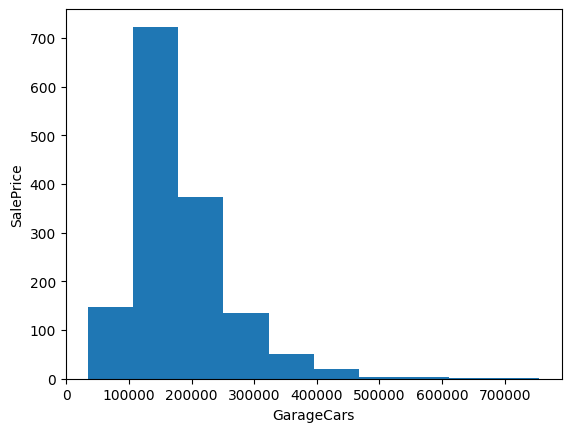

In [25]:
plt.hist(df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

In [15]:
sumary_stat=df[['SalePrice', 'OverallQual', 'GrLivArea', 'GarageCars', 'LotArea', 'YearBuilt']].describe()
sumary_stat


,SalePrice,OverallQual,GrLivArea,GarageCars,LotArea,YearBuilt
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,180921.195890,6.099315,1515.463699,1.767123,10516.828082,1971.267808
std,79442.502883,1.382997,525.480383,0.747315,9981.264932,30.202904
min,34900.000000,1.000000,334.000000,0.000000,1300.000000,1872.000000
25%,129975.000000,5.000000,1129.500000,1.000000,7553.500000,1954.000000
50%,163000.000000,6.000000,1464.000000,2.000000,9478.500000,1973.000000
75%,214000.000000,7.000000,1776.750000,2.000000,11601.500000,2000.000000
max,755000.000000,10.000000,5642.000000,4.000000,215245.000000,2010.000000


In [20]:
z_score = stats.zscore(df['SalePrice'])

z_score

0       0.347273
1       0.007288
2       0.536154
3      -0.515281
4       0.869843
          ...   
1455   -0.074560
1456    0.366161
1457    1.077611
1458   -0.488523
1459   -0.420841
Name: SalePrice, Length: 1460, dtype: float64

In [27]:
treshold = 450000
out = df['SalePrice'][z_score > treshold]
df.loc[z_score > treshold, 'SalePrice'] = df['SalePrice'].median()

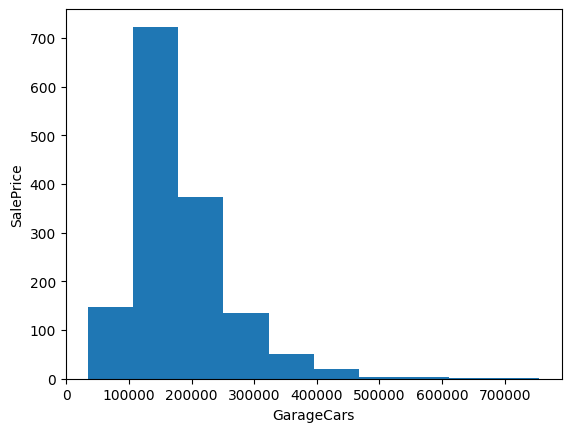

In [28]:
plt.hist(df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

In [29]:
scaler = StandardScaler()
df[['SalePrice']]=scaler.fit_transform(df[['SalePrice']])

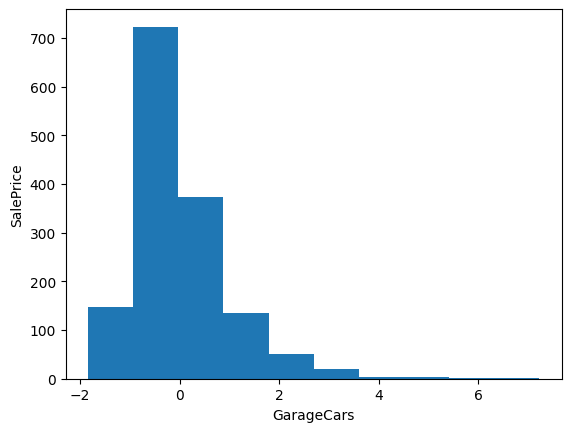

In [30]:
plt.hist(df['SalePrice'])
plt.xlabel('GarageCars')
plt.ylabel('SalePrice')
plt.show()

In [32]:
df = pd.read_csv('cleaned_house_prices.csv')

In [33]:
le = LabelEncoder()
df['Type_encoder'] = le.fit_transform(df['Street'])
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,Type_encoder
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,2,2008,WD,Normal,208500,1
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,0,0,0,5,2007,WD,Normal,181500,1
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,9,2008,WD,Normal,223500,1
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,2,2006,WD,Abnorml,140000,1
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,0,0,0,12,2008,WD,Normal,250000,1


In [34]:
df.to_csv('cleaned_house_prices.csv', index=False)